In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
%matplotlib inline
from sklearn.feature_extraction import text as TEXT
import re
from nltk.tokenize import RegexpTokenizer,wordpunct_tokenize, sent_tokenize
import os
from gensim.models import ldamulticore
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models, similarities, matutils
from sklearn.decomposition import TruncatedSVD
from nltk.tokenize import RegexpTokenizer
from nltk.stem import LancasterStemmer, PorterStemmer
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel
import nltk
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
import glob
import os

#file_list = glob.glob(os.path.join("d:/downloads/cnn/sub_st/", "*.story",))
file_list = glob.glob(os.path.join("/home/ubuntu/cnn/", "*.story",))
corpus = {}

for i,file_path in enumerate(file_list):
    with open(file_path,encoding="utf8") as f_input:
        corpus[i]=f_input.read().strip("\n")
        #print(i)


In [3]:
lemmer=WordNetLemmatizer()
stemmer = PorterStemmer()
regex=RegexpTokenizer("\\b[a-zA-Z][a-zA-Z][a-zA-Z]+\\b")

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        
        stemmed.append(lemmer.lemmatize(item,'v'))
    return stemmed

def tokenize(text):
    tokens = regex.tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems
stop=["(CNN)",'com',"people","new","says","said","time","like","just","years","student news",
      "news","cnn student",'cnn',"wa","ha","highlight","say","want","know","according","tell",
      "come","way","lot","try","look","really","use","feel","make","year"]
stop_wd=TEXT.ENGLISH_STOP_WORDS.union(stop)

# Create a TFiDF Vectorizer for parsing/counting words

In [5]:
tf=TfidfVectorizer(stop_words=stop_wd,ngram_range=(1,2),tokenizer=tokenize
                   ,max_df=0.8,min_df=15)                   
                 
mat_tf=tf.fit_transform(corpus.values())


In [6]:
#pickling the processed TFiDf Vectorizer
import pickle
pickling_on = open("mat_tf.pickle","wb")
pickle.dump(mat_tf, pickling_on)
pickling_on.close()

In [4]:
#Loading pickled data as TFiDf Vectorizer
import pickle
pickle_off = open("mat_tf.pickle","rb")
mat_tf = pickle.load(pickle_off)

In [11]:
# tfidf_2corpus=matutils.Sparse2Corpus(mat_tf.transpose()) #converting to sparse matrix
# words2idf=dict((v,k) for k,v in tf.vocabulary_.items())
# words2idf=corpora.Dictionary.from_corpus(corpus=tfidf_2corpus,id2word=words2idf)

In [8]:
#pickling the processed word2idf Vectorizer
# import pickle
# pickling_on = open("words2idf_tf","wb")
# pickle.dump(words2idf, pickling_on)
# pickling_on.close()


pickle_off = open("words2idf_tf","rb")
words2idf_tf = pickle.load(pickle_off)



In [12]:
lsi = models.LsiModel(tfidf_2corpus, id2word=words2idf_tf, num_topics=33)

2018-03-08 01:31:25,804 : INFO : using serial LSI version on this node
2018-03-08 01:31:25,804 : INFO : updating model with new documents
2018-03-08 01:31:26,883 : INFO : preparing a new chunk of documents
2018-03-08 01:31:27,958 : INFO : using 100 extra samples and 2 power iterations
2018-03-08 01:31:27,958 : INFO : 1st phase: constructing (256744, 133) action matrix
2018-03-08 01:31:28,954 : INFO : orthonormalizing (256744, 133) action matrix
2018-03-08 01:31:35,030 : INFO : 2nd phase: running dense svd on (133, 20000) matrix
2018-03-08 01:31:35,239 : INFO : computing the final decomposition
2018-03-08 01:31:35,240 : INFO : keeping 33 factors (discarding 46.284% of energy spectrum)
2018-03-08 01:31:35,321 : INFO : processed documents up to #20000
2018-03-08 01:31:35,380 : INFO : topic #0(17.330): 0.120*"state" + 0.112*"police" + 0.107*"obama" + 0.096*"president" + 0.089*"report" + 0.088*"government" + 0.084*"world" + 0.076*"work" + 0.072*"kill" + 0.070*"attack"
2018-03-08 01:31:35,38

2018-03-08 01:32:12,690 : INFO : keeping 33 factors (discarding 1.126% of energy spectrum)
2018-03-08 01:32:12,809 : INFO : processed documents up to #92579
2018-03-08 01:32:12,814 : INFO : topic #0(37.245): 0.119*"state" + 0.111*"police" + 0.107*"obama" + 0.097*"president" + 0.091*"government" + 0.090*"report" + 0.084*"world" + 0.076*"work" + 0.073*"kill" + 0.071*"unite"
2018-03-08 01:32:12,818 : INFO : topic #1(19.930): 0.167*"win" + 0.151*"game" + -0.148*"obama" + 0.123*"play" + -0.120*"syria" + 0.119*"match" + 0.118*"league" + 0.118*"team" + -0.117*"government" + -0.115*"military"
2018-03-08 01:32:12,824 : INFO : topic #2(18.484): -0.349*"police" + 0.312*"obama" + 0.164*"president" + -0.129*"officer" + -0.117*"kill" + 0.113*"republicans" + 0.112*"vote" + 0.110*"romney" + -0.104*"authorities" + -0.104*"shoot"
2018-03-08 01:32:12,829 : INFO : topic #3(17.636): -0.144*"korea" + -0.140*"syria" + 0.119*"obama" + -0.117*"league" + -0.110*"north" + -0.109*"military" + -0.106*"north korea"

In [13]:
# Retrieve vectors for the original tfidf corpus in the LSI space ("transform" in sklearn)
lsi_corpus = lsi[tfidf_2corpus]
# Dump the resulting document vectors into a list so we can take a look
doc_vecs = [doc for doc in lsi_corpus]


In [13]:
# returns sorted values of the concept numbers with weights. 
# this one is for document 1
sorted(doc_vecs[100],key=lambda x: x[1],reverse=True)[:10]


[(32, 0.14475364651325226),
 (0, 0.10327443169980616),
 (29, 0.090158433364683779),
 (31, 0.070563922211555441),
 (26, 0.053900879310897529),
 (24, 0.047887173598270341),
 (28, 0.035663391598823119),
 (6, 0.034186583036385811),
 (20, 0.027273704399751183),
 (23, 0.027136294215856151)]

In [14]:
lsi.print_topics(num_topics=33,num_words=15)

2018-03-08 01:33:36,043 : INFO : topic #0(37.245): 0.119*"state" + 0.111*"police" + 0.107*"obama" + 0.097*"president" + 0.091*"government" + 0.090*"report" + 0.084*"world" + 0.076*"work" + 0.073*"kill" + 0.071*"unite" + 0.070*"group" + 0.070*"think" + 0.069*"attack" + 0.068*"win" + 0.067*"right"
2018-03-08 01:33:36,048 : INFO : topic #1(19.930): 0.167*"win" + 0.151*"game" + -0.148*"obama" + 0.123*"play" + -0.120*"syria" + 0.119*"match" + 0.118*"league" + 0.118*"team" + -0.117*"government" + -0.115*"military" + 0.114*"cup" + 0.113*"champion" + 0.112*"season" + 0.109*"world" + 0.108*"club"
2018-03-08 01:33:36,054 : INFO : topic #2(18.484): -0.349*"police" + 0.312*"obama" + 0.164*"president" + -0.129*"officer" + -0.117*"kill" + 0.113*"republicans" + 0.112*"vote" + 0.110*"romney" + -0.104*"authorities" + -0.104*"shoot" + 0.103*"clinton" + -0.102*"arrest" + 0.100*"republican" + -0.096*"charge" + 0.096*"democrats"
2018-03-08 01:33:36,059 : INFO : topic #3(17.636): -0.144*"korea" + -0.140*"sy

2018-03-08 01:33:36,165 : INFO : topic #27(10.063): 0.234*"obama" + 0.169*"women" + 0.165*"marriage" + -0.143*"party" + 0.137*"sex" + -0.135*"game" + 0.130*"police" + -0.129*"vote" + -0.128*"pakistan" + -0.126*"romney" + -0.126*"school" + 0.108*"officer" + -0.103*"world cup" + -0.103*"republican" + 0.102*"egypt"
2018-03-08 01:33:36,169 : INFO : topic #28(9.896): -0.177*"iraq" + -0.165*"game" + -0.164*"afghanistan" + 0.154*"pakistan" + 0.139*"isis" + 0.137*"attack" + -0.137*"military" + -0.131*"troop" + -0.129*"afghan" + -0.120*"iraqi" + 0.118*"qaeda" + 0.103*"boko" + 0.102*"boko haram" + 0.102*"group" + 0.101*"haram"
2018-03-08 01:33:36,175 : INFO : topic #29(9.620): -0.238*"ship" + -0.230*"marriage" + 0.184*"women" + 0.168*"drug" + -0.164*"sex" + -0.133*"pirate" + -0.132*"sex marriage" + -0.130*"gay" + 0.122*"mexico" + -0.116*"ebola" + 0.112*"clinton" + -0.111*"police" + 0.109*"million" + 0.105*"egypt" + 0.104*"storm"
2018-03-08 01:33:36,178 : INFO : topic #30(9.321): 0.229*"pakistan"

[(0,
  '0.119*"state" + 0.111*"police" + 0.107*"obama" + 0.097*"president" + 0.091*"government" + 0.090*"report" + 0.084*"world" + 0.076*"work" + 0.073*"kill" + 0.071*"unite" + 0.070*"group" + 0.070*"think" + 0.069*"attack" + 0.068*"win" + 0.067*"right"'),
 (1,
  '0.167*"win" + 0.151*"game" + -0.148*"obama" + 0.123*"play" + -0.120*"syria" + 0.119*"match" + 0.118*"league" + 0.118*"team" + -0.117*"government" + -0.115*"military" + 0.114*"cup" + 0.113*"champion" + 0.112*"season" + 0.109*"world" + 0.108*"club"'),
 (2,
  '-0.349*"police" + 0.312*"obama" + 0.164*"president" + -0.129*"officer" + -0.117*"kill" + 0.113*"republicans" + 0.112*"vote" + 0.110*"romney" + -0.104*"authorities" + -0.104*"shoot" + 0.103*"clinton" + -0.102*"arrest" + 0.100*"republican" + -0.096*"charge" + 0.096*"democrats"'),
 (3,
  '-0.144*"korea" + -0.140*"syria" + 0.119*"obama" + -0.117*"league" + -0.110*"north" + -0.109*"military" + -0.106*"north korea" + -0.106*"syrian" + -0.102*"cup" + -0.101*"iran" + -0.101*"match

In [15]:
corpus[100]

'London (CNN) -- Drug smugglers are using ever more creative methods to hide their stashes, including tucking them inside yams, peanuts and birthday cards, a new list reveals.\n\nThe list -- released by the UK Border Agency -- rounds up last year\'s most unusual drug concealments. Details of the smuggling scams are used to raise awareness on drug traffickers\' ploys and the penalties that follow.\n\n"These smuggling attempts show the lengths that organized criminals will go to in a bid to get drugs into the UK," said Brodie Clark, chief of Border Force.\n\nIn March, authorities nabbed a suspect with cocaine concealed in packets of peanuts and cashew nuts. The freight at Gatwick Airport had been sent from Jamaica. A 50-year-old man pleaded guilty to drug smuggling and was sent to prison for seven years.\n\nIn another case, cocaine was found in metal drums containing powdered nuts at Heathrow Airport. It had originated in Mexico and was destined for Melbourne, Australia. In a joint opera

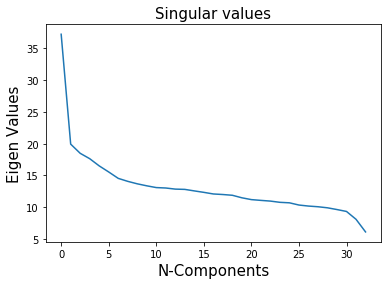

In [16]:

plt.title("Singular values", size=15)
plt.ylabel("Eigen Values", size=15)
plt.xlabel("N-Components", size=15);
plt.plot([x for x in range(len(lsi.projection.s))],lsi.projection.s)

# Cosine Similarity Gensim

## Recomender system

In [58]:
# Create an index transformer that calculates similarity based on our space
index = similarities.MatrixSimilarity(doc_vecs)

# Return the sorted list of cosine similarities to the first document
def get_similar_documents(doc_number):
    #sims
    index = similarities.MatrixSimilarity(doc_vecs)
    sims = sorted(enumerate(index[doc_vecs[doc_number]]), key=lambda item: -item[1])
    #Returns similar documents in terms of a similarity score.
    # This one returns the score for document 63000
    for sim_doc_id, sim_score in sims[:4]: 
        print("\033[1m"+"\nScore: " + str(sim_score))
        print("Document: " + corpus[sim_doc_id][:700])
    





2018-03-08 03:30:31,115 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2018-03-08 03:30:31,350 : INFO : creating matrix with 92579 documents and 33 features


In [61]:
stories=(get_similar_documents(63000))

2018-03-08 03:33:20,278 : WARNING : scanning corpus to determine the number of features (consider setting `num_features` explicitly)
2018-03-08 03:33:20,514 : INFO : creating matrix with 92579 documents and 33 features



Score: 1.0
Document: BAGHDAD, Iraq (CNN) -- All vehicles were banned from the largely Shiite city of Amara Wednesday after three car bombs ripped through a market district, killing at least 27 people and wounded 151, officials said.

Iraqis gather at the site of a car bomb in the city of Amara on Wednesday.

The blasts detonated in close succession in a commercial area in the central section of Amara, the provincial capital of Maysan province and a city that has been the scene of fighting between rival Shiite factions.

Baghdad was also hit by violence on Wednesday. A car bomb there killed five Iraqi civilians and wounded 15 others, an Interior Ministry official told CNN. The incident occurred in a Christian sec

Score: 0.978487
Document: BAGHDAD, Iraq (CNN)  -- U.S. Army Brig. Gen. Jeffrey Dorko was injured Monday when a roadside bomb exploded near his vehicle in Baghdad, Pentagon sources said.

U.S. Army Brig. Gen. Jeffrey Dorko has been evacuated to Germany, Pentagon sources said.


In [38]:
terms=tf.get_feature_names()
for i,components in enumerate(lsa.components_):
    termsInConcept=zip(terms,components)
    sortedTerms=sorted(termsInConcept, key=lambda x: x[1],reverse=True)[:10]
    print("Concept :",i)
    for term in sortedTerms:
        print(term[0])


# **TruncatedSVD**  

In [40]:
mat_tf.shape

lsa=TruncatedSVD(n_components=50,n_iter=15,random_state=442,)

lsa.fit(mat_tf)

lsa.transform(mat_tf)

import seaborn as sns

plt.title("Explained variance", size=15)
plt.ylabel("Percent explained", size=15)
plt.xlabel("N-Components", size=15);
plt.bar([x for x in range(len(lsa.explained_variance_ratio_))],sorted(lsa.explained_variance_ratio_,key=lambda x: x, reverse=True))



(92579, 260081)

In [69]:
print("Sum of explained variances",lsa.explained_variance_ratio_.sum())

Sum of explained variances 0.0777012766197


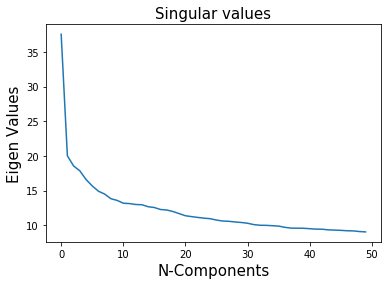

In [74]:
plt.title("Singular values", size=15)
plt.ylabel("Eigen Values", size=15)
plt.xlabel("N-Components", size=15);
plt.plot([x for x in range(len(lsa.singular_values_))], lsa.singular_values_)

In [35]:
import wordcloud

In [45]:
import random
wc = wordcloud.WordCloud(max_words=1000, stopwords=stop_wd, margin=10,
               random_state=1).generate(corpus[900])

def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

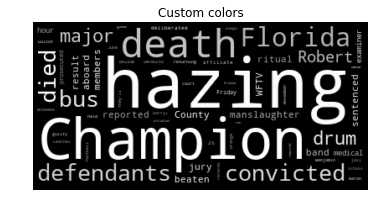

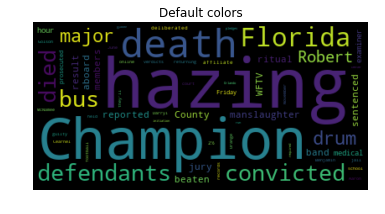

In [46]:
default_colors = wc.to_array()
plt.title("Custom colors")
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
wc.to_file("a_new_hope.png")
plt.axis("off")
plt.figure()
plt.title("Default colors")
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()